# Numerical and symbolic math in Python

### Some motivation

The Lotka-Volterra model, also known as the predator-prey model, is a foundational concept in mathematical ecology. It uses a system of differential equations to describe the dynamics of two populations interacting with each other, typically a predator and its prey.

The model captures the idea that the prey population grows at a rate proportional to its current size, but this growth is limited by predation. Predators, on the other hand, increase their numbers based on how much prey they consume, but also die naturally.
The model uses two coupled differential equations, one for each population (prey and predator). These equations track the rate of change in the populations over time.

- Variables:
    - Prey population is denoted by X.
    - Predator population is denoted by Y.
- Parameters:
    - α: Represents the prey's intrinsic growth rate (growth in absence of predators).
    - β: Represents the rate at which predators consume prey (proportional to both prey and predator population).
    - δ: Represents the predator's growth rate presence.
    - γ: Represents the predator's death rate (natural mortality or emigration).

The interplay between these factors creates a dynamic where the predator and prey populations fluctuate around an equilibrium point.


Prey Population (dx/dt):

$$ \frac{dx}{dt} = \alpha x - \beta  x  y $$

Predator Population (dy/dt):

$$ \frac{dy}{dt} =  \delta x y - \gamma y$$

If you'd like to delve deeper, you can explore resources like Wikipedia's article on Lotka-Volterra equations https://en.wikipedia.org/wiki/Lotka%E2%80%93Volterra_equations.

In [7]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
sns.set_theme(
    style='white',
    context='notebook',
    font_scale=1.5
)


Let's look at some simple examples before we tackle the Lotka-Volterra model.

We will use Scipy, SciPy is a Python library used for scientific and technical computing. It provides many numerical routines for tasks such as optimization, integration, interpolation, linear algebra, signal processing, and much more. SciPy is built on top of NumPy


Let's experiment with `scipy.integrate.quad`. A method for numerical integration.

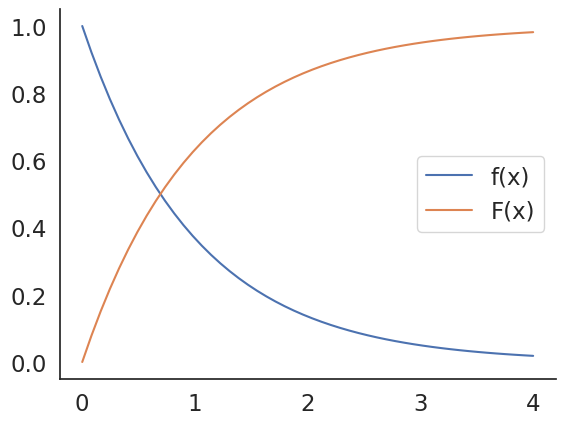

In [21]:
from scipy import integrate

x = np.linspace(0, 4)
def f(x): 
    return np.exp(-x)

@np.vectorize # vectorize lets F work on arrays rather than scalars
def F(x):
    return integrate.quad(f, a=0, b=x)[0]

plt.plot(x, f(x), label='f(x)')
plt.plot(x, F(x), label='F(x)')
plt.legend()
sns.despine()

## Exercise - Numerical integration

Integrate the function $\frac{\log(t)}{1+t}$ from $1$ to $x$ using one of the integration functions in `scipy.integrate` and plot the results for $x \in (1,2)$.

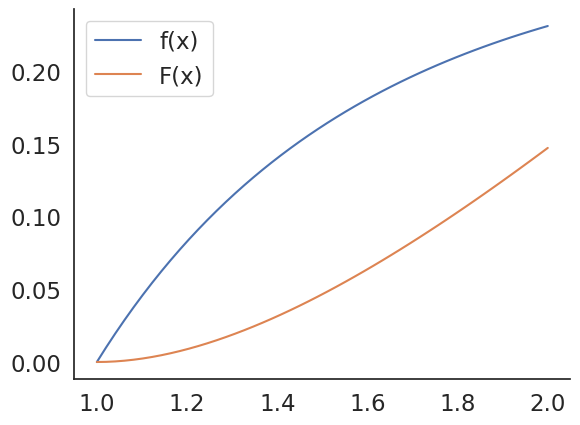

# Sybmolic integration with *SymPy*

[![SymPy logo](http://docs.sympy.org/latest/_static/sympylogo.png)](http://sympy.org/)

*SymPy* is a Python library for symbolic mathematics. It allows you to perform symbolic computations, which means working with mathematical expressions as symbols rather than specific numerical values. With SymPy, you can manipulate algebraic expressions, solve equations, differentiate and integrate functions symbolically, perform calculus operations, and much more. 

Right now we will focus on symbolic integration. Install with `conda install sympy` or `pip install sympy`.

In [12]:
import sympy
print("SymPy version:", sympy.__version__)
sympy.init_printing() # for notebook display

SymPy version: 1.12


First we must define our symbols. As we are working with a single variable functions, we only need `x`:

In [24]:
t = sympy.symbols('t')
f = sympy.exp(-t)
f

In [25]:
sympy.integrate?

Signature:
sympy.integrate(
    *args,
    meijerg=None,
    conds='piecewise',
    risch=None,
    heurisch=None,
    manual=None,
    **kwargs,
)
Docstring:
integrate(f, var, ...)

.. deprecated:: 1.6

   Using ``integrate()`` with :class:`~.Poly` is deprecated. Use
   :meth:`.Poly.integrate` instead. See :ref:`deprecated-integrate-poly`.

Explanation

Compute definite or indefinite integral of one or more variables
using Risch-Norman algorithm and table lookup. This procedure is
able to handle elementary algebraic and transcendental functions
and also a huge class of special functions, including Airy,
Bessel, Whittaker and Lambert.

var can be:

- a symbol                   -- indefinite integration
- a tuple (symbol, a)        -- indefinite integration with result
                                given with ``a`` replacing ``symbol``
- a tuple (symbol, a, b)     -- definite integration

Several variables can be specified, in which case the result is
multiple integration. (If var is 

In [26]:
F = sympy.integrate(f, t)
F

To evaluate a function we use the `evalf` methods and define the substitution from a symbol to a number.

We can also produce a definite integral.

In [27]:
fx = [f.evalf(subs={t: xi}) for xi in x]
F0 = F.evalf(subs={t: 0})
Fx = [F.evalf(subs={t: xi}) - F0 for xi in x] # I can also use sympy.integrate(f, (t, 0, xi)) but it is slower

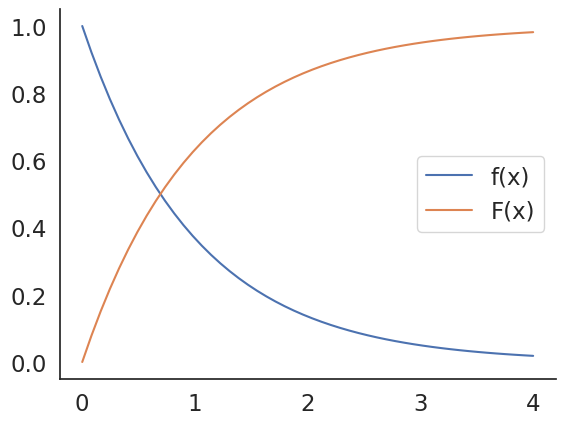

In [28]:
plt.plot(x, fx, label='f(x)')
plt.plot(x, Fx, label='F(x)')
plt.legend(loc='center right')
sns.despine()

## Exercise - Symbolic differentiation

Calculate the derivative of  $\frac{\log{t}}{1+t}$ with respect to $t$ using `sympy.diff`.
Print it and and plot it for $t \in (1, 2)$. Compare the result with the numerical differentiation result from above.

## SymPy - more

SymPy can do much more.

For example, solve equation systems:

In [29]:
x, y,z  = sympy.symbols('x y z')

eqs = (
    x + 5*y - 2, 
    -3*x + 6*y - 15
)

sol = sympy.solve(eqs, (x, y))
sol

In [30]:
eqs[0].subs(sol), eqs[1].subs(sol)

Find a limit:

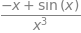

In [31]:
expr = (sympy.sin(x) - x) / x**3
expr


In [32]:
sympy.limit(expr, x, 0)

## Automatic differentiation with `autograd`

[Automatic differentiation](https://en.wikipedia.org/wiki/Automatic_differentiation) is a different kind of a differentiation algorithm.

There are different ways to implement automatic differentiation, but the idea is the same.
Given a computer-function `f(x)` that computes the math-function $f(x)$, automatic differentiation is an algorithm that produces the computer-function `df(x)` which computes the math-function $\frac{d}{dx}f(x)$.

![](https://upload.wikimedia.org/wikipedia/commons/3/3c/AutomaticDifferentiationNutshell.png)

This can accomplished when all operations made by `f(x)` are differentiable in the sense that their derivative can be computed.
If all such operations are differentiable, then `df(x)` can be produced by applying the chain-rule, similar to *back-propagation* in neural networks.

In Python, automatic differentiation is implemented by several packages, but we are going to use the [AutoGrad](https://github.com/HIPS/autograd) package which is specifically designed for use with NumPy in neural network applications.

Install with: `conda install autograd -c conda-forge` or `pip install autograd`

### Example (by hand):

Let's consider a simple mathematical function:

$$  f(x) = x^2 + 3x  $$

We want to compute its derivative, $ f'(x) $ ,using automatic differentiation.

Step 1: Break down the function into elementary operations:
$$ u = x^2 $$
$$ v = 3x $$
$$ f = u + v $$

Step 2: Compute the derivatives of each elementary operation:

$\frac{du}{dx} = 2x $ derivative of $ x^2 $

$ \frac{dv}{dx} = 3  $ derivative of $  3x $

Step 3: Use the chain rule to combine derivatives:
$$ \frac{df}{dx} = \frac{du}{dx} + \frac{dv}{dx} $$

Step 4: Substitute the derivatives we computed:
$$ \frac{df}{dx} = 2x + 3 $$

So, the derivative of $ f(x) $ with respect to $ x $ is $ 2x + 3 $. 

This process of breaking down the function into elementary operations, computing their derivatives, and applying the chain rule is what automatic differentiation does under the hood. It allows us to efficiently find the derivatives of complex functions without having to manually derive them.

## Example (with code)

`f(x, y, p)` implements the function:
$$
f_p(x,y) = x^2 +2pxy +y^2
$$
such that 
$$
f_1(x,y) = (x+y)^2 \\
f_{-1}(x,y)=(x-y)^2 \\ 
f_0(x,y)=x^2+y^2
$$

In [33]:
def f(x, y, p=0):
    z = x**2 # dz/dx = 2*x; dz/dy = 0
    v = y**2 # dv/dx = 0; dv/dy = 2*y
    u = 2*p*x*y # du/dx = 2*p*y;  du/dy = 2*p*x
    q = z + v + u # dq/dx = dz/dx + dv/dx + du/dx; dq/dy = ...
    return q # dq/dx; dq/dy

Let's visualize the function with $p=0.5$, $x\in(-1,1)$ and $y\in(-1,1)$:

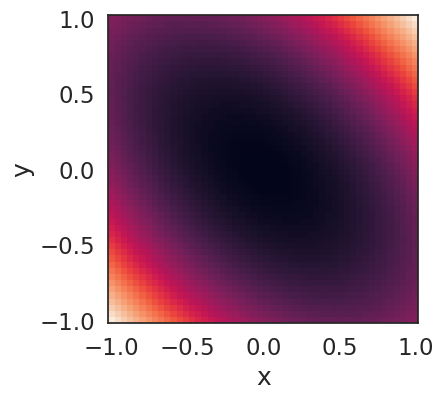

In [34]:
x = np.linspace(-1, 1)
y = np.linspace(-1, 1).reshape(-1, 1)
p = 0.5

Z = f(x, y, p)

fig, ax = plt.subplots(figsize=(4, 4))
ax.pcolormesh(x, y, Z)
ax.set(xlabel='x', ylabel='y', 
       xticks=np.linspace(x.min(), x.max(), 5), 
       yticks=np.linspace(y.min(), y.max(), 5));

We can now calculate and plot the gradient of `f(x, y, p)` w.r.t `x` and `y` using two functions, `dfdx(x, y, p)` and `dfdy(x, y, p)`. 

To do that, we use the function `grad` from the package [AutoGrad](https://github.com/HIPS/autograd/blob/master/docs/tutorial.md).

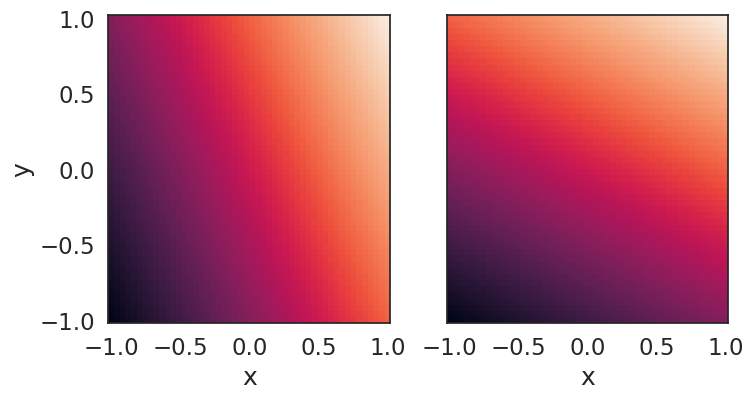

In [18]:
from autograd import grad

dfdx = grad(f, 0)
dfdx = np.vectorize(dfdx)
dfdy = grad(f, 1)
dfdy = np.vectorize(dfdy)

p = 0.5
Zx = dfdx(x, y, p)
Zy = dfdy(x, y, p)

fig, axes = plt.subplots(1, 2, figsize=(8, 4), sharex=True, sharey=True)
axes[0].pcolormesh(x, y, Zx)
axes[1].pcolormesh(x, y, Zy)
axes[0].set(xlabel='x', ylabel='y', xticks=np.linspace(x.min(), x.max(), 5), yticks=np.linspace(y.min(), y.max(), 5))
axes[1].set(xlabel='x');

In [38]:
# Example from https://scipy-cookbook.readthedocs.io/items/LoktaVolterraTutorial.html

import numpy as np
from scipy import integrate

# Definition of parameters
params = {
    "a": 1.5,
    "b": 1.0,
    "c": 1.0,
    "d": 3.0
}
def dX_dt(X, t=0):
    """ Return the growth rate of fox and rabbit populations. """
    return np.array([ params["a"]*X[0] - params["b"]*X[0]*X[1] ,
                      params["c"]*X[0]*X[1] - params["d"]*X[1] ])


t = np.linspace(0, 15,  1000)              # time
X0 = np.array([10, 5])                     # initials conditions: 10 rabbits and 5 foxes
X, infodict = integrate.odeint(dX_dt, X0, t, full_output=True)
infodict['message']                     # >>> 'Integration successful.'

'Integration successful.'

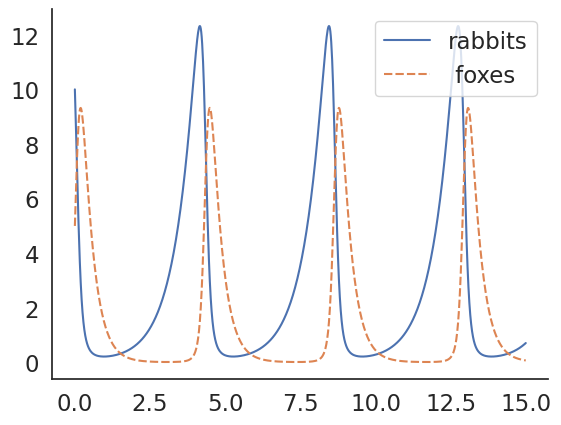

In [39]:
import pandas as pd
rabbits, foxes = X.T
# data = np.concatenate((t.reshape(len(t),-1), X), axis=1)

lotka_volterra_df = pd.DataFrame(data=X, index=t, columns=["rabbits", " foxes"])
sns.lineplot(data=lotka_volterra_df)
sns.despine()


Can we find a situation in which the system is stable?

This means the change is 0:

$$ \frac{dx}{dt} = \alpha x - \beta  x  y = 0 $$

$$ \frac{dy}{dt} =  \delta x y - \gamma y = 0 $$

Let's solve this system symbolically using Sympy.

In [100]:
from sympy import nonlinsolve # the system is non-linear because of the x*y terms.

x, y, a, b, c, d  = sympy.symbols('x y a b c d')

eqs = (
    a*x - b*x*y, 
    c*x*y - d*y
)

sol = nonlinsolve(eqs, (x, y))
sol

We got two solutions:
- $(0,0)$

- $(\frac{d}{c},\frac{a}{b})$

Let's plug-in our parameters from before and see what we get:

In [101]:
sol.args[1].subs(params)

### Exercise

Check using a plot that the previous result is indeed an equilibrium. 

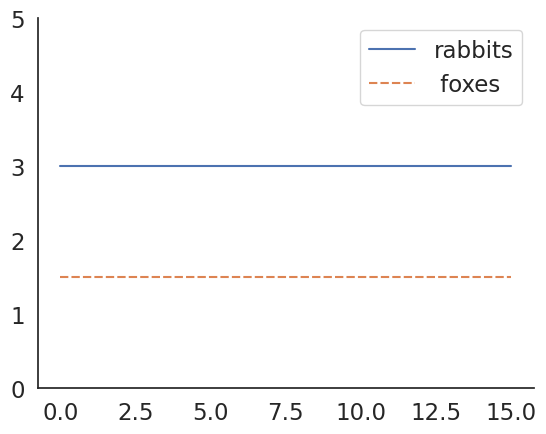